<a href="https://colab.research.google.com/github/Owino-Paul/Learn_Git/blob/master/Data_Visualisation_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Panda Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Installing Pandas Profiling
!pip install pandas-profiling
!pip install ydata-profiling

  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [ ]:
from scipy import stats
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Install Numba
!pip install numba

In [ ]:
# Read Data
data = pd.read_csv('Interpol.csv')
data.head()

,Country,National Fugitives,Wanted Fugitives,Possible Hosted Fugitives / Captured Fugitives,Region,Flag
0,Albania,3,3,0,Europe,http://www.crwflags.com/fotw/images/a/al.gif
1,Angola,0,0,1,Northern Africa,http://www.crwflags.com/fotw/images/a/ao.gif
2,Argentina,2,2,1,South America,http://www.crwflags.com/fotw/images/a/ar.gif
3,Australia,1,1,2,Oceania,http://www.crwflags.com/fotw/images/a/au.gif
4,Austria,1,1,0,Europe,http://www.crwflags.com/fotw/images/a/at.gif


In [ ]:
# Get Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Country                                         78 non-null     object
 1   National Fugitives                              78 non-null     int64 
 2   Wanted Fugitives                                78 non-null     int64 
 3   Possible Hosted Fugitives / Captured Fugitives  78 non-null     int64 
 4   Region                                          78 non-null     object
 5   Flag                                            78 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [ ]:
# Descirbe the Data
data.describe()

,National Fugitives,Wanted Fugitives,Possible Hosted Fugitives / Captured Fugitives
count,78.000000,78.000000,78.000000
mean,1.282051,1.217949,1.615385
std,1.528070,1.600710,2.169630
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,8.000000,11.000000,13.000000


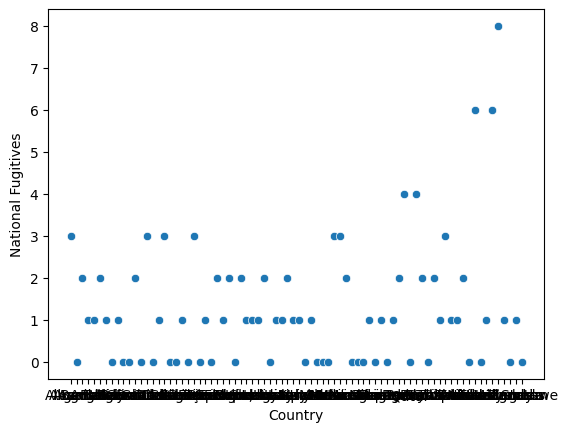

In [ ]:
# ScatterPlot visualization of NATIONAL and FUGITIVES
sns.scatterplot(x='Country', y='National Fugitives', data=data)
plt.show()

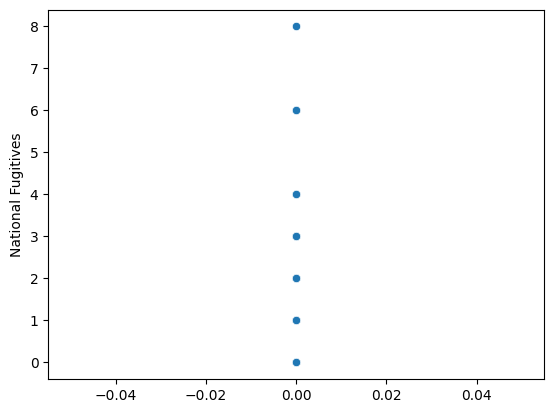

In [ ]:
# ScatterPlot visualization of NATIONAL and FUGITIVES specific country
sns.scatterplot(x='Country' == "Argentina", y='National Fugitives', data=data)
plt.show()

In [ ]:
# fileter Country with highest Natational Fugitives
data[data['National Fugitives'] == data['National Fugitives'].max()]

,Country,National Fugitives,Wanted Fugitives,Possible Hosted Fugitives / Captured Fugitives,Region,Flag
73,United States,8,11,6,North America,http://www.crwflags.com/fotw/images/u/us.gif


In [ ]:
# Filert top 10 countries with higest national fugitives
data.sort_values('National Fugitives', ascending=False).head(10)

,Country,National Fugitives,Wanted Fugitives,Possible Hosted Fugitives / Captured Fugitives,Region,Flag
73,United States,8,11,6,North America,http://www.crwflags.com/fotw/images/u/us.gif
69,The Netherlands,6,3,8,Europe,http://www.crwflags.com/fotw/images/n/nl.gif
72,United Kingdom,6,4,7,Europe,http://www.crwflags.com/fotw/images/g/gb.gif
59,Romania,4,4,0,Europe,http://www.crwflags.com/fotw/images/r/ro.gif
57,Poland,4,4,3,Europe,http://www.crwflags.com/fotw/images/p/pl.gif
0,Albania,3,3,0,Europe,http://www.crwflags.com/fotw/images/a/al.gif
21,Czech Republic,3,3,0,Europe,http://www.crwflags.com/fotw/images/c/cz.gif
45,Mexico,3,0,6,Central America,http://www.crwflags.com/fotw/images/m/mx.gif
16,Colombia,3,0,1,South America,http://www.crwflags.com/fotw/images/c/co.gif
13,Canada,3,4,2,North America,http://www.crwflags.com/fotw/images/c/ca.gif


In [ ]:
# Getting top 10 countries with national fugitives (Version 2)
data.sort = data.nlargest(10, 'National Fugitives')
data.sort

<ipython-input-21-f4a17874081a>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.sort = data.nlargest(10, 'National Fugitives')


,Country,National Fugitives,Wanted Fugitives,Possible Hosted Fugitives / Captured Fugitives,Region,Flag
73,United States,8,11,6,North America,http://www.crwflags.com/fotw/images/u/us.gif
69,The Netherlands,6,3,8,Europe,http://www.crwflags.com/fotw/images/n/nl.gif
72,United Kingdom,6,4,7,Europe,http://www.crwflags.com/fotw/images/g/gb.gif
57,Poland,4,4,3,Europe,http://www.crwflags.com/fotw/images/p/pl.gif
59,Romania,4,4,0,Europe,http://www.crwflags.com/fotw/images/r/ro.gif
0,Albania,3,3,0,Europe,http://www.crwflags.com/fotw/images/a/al.gif
13,Canada,3,4,2,North America,http://www.crwflags.com/fotw/images/c/ca.gif
16,Colombia,3,0,1,South America,http://www.crwflags.com/fotw/images/c/co.gif
21,Czech Republic,3,3,0,Europe,http://www.crwflags.com/fotw/images/c/cz.gif
45,Mexico,3,0,6,Central America,http://www.crwflags.com/fotw/images/m/mx.gif


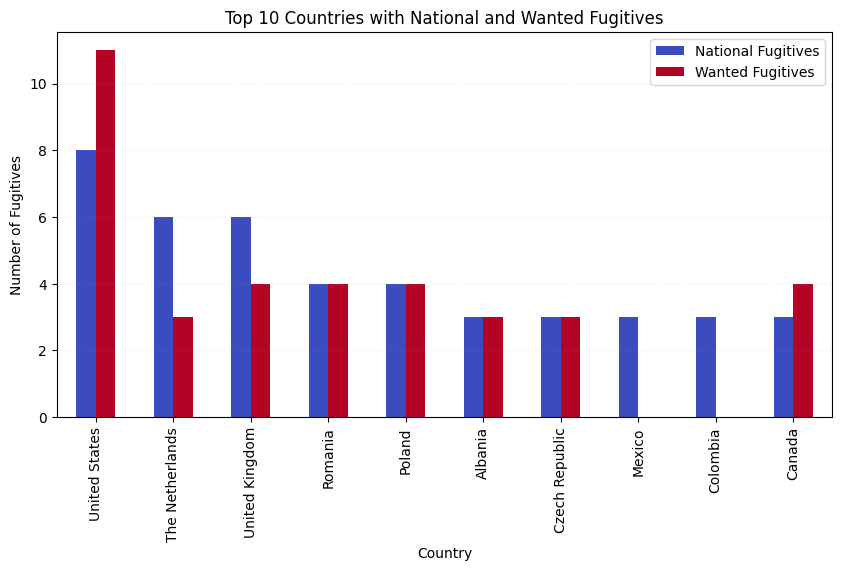

In [ ]:
# Visualization using Bar Graph for top 10 countries with National and Wanted Fugitives
Top_Countries = data.sort_values('National Fugitives', ascending=False).head(10)
Top_Countries.set_index("Country") [["National Fugitives", "Wanted Fugitives"]].plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.title("Top 10 Countries with National and Wanted Fugitives")
plt.xlabel("Country")
plt.ylabel("Number of Fugitives")
plt.xticks(rotation=90)
plt.legend(["National Fugitives", "Wanted Fugitives"])
plt.grid(axis="y", linestyle="--", alpha=0.1) # adds grid lines
plt.show()

In [ ]:
# import Plotly
import plotly.express as px

In [ ]:
# Plotly Bar Graph I
Top_Countries_plotly = px.bar(Top_Countries, x="Country", y=["National Fugitives", "Wanted Fugitives"],
                              title="Top 10 Countries with National and Wanted Fugitives",
                              labels = {"Variable": "Fugitive Type", "value": "Number of Fugitives"},
                              barmode = 'group')

Top_Countries_plotly.show()

In [ ]:
# Plotly Bar graph II
Top_Countries_plotly = px.bar(
    Top_Countries,
    x="Country", y=["National Fugitives", "Wanted Fugitives"],
    title="Top 10 Countries with National and Wanted Fugitives",
    labels={"Country": "Country", "value": "Number of Fugitives", "variable": "Fugitive Type"},
    barmode='group')

# Display the plot
Top_Countries_plotly.show()

In [ ]:
# Plotly Pie Chart
